<img src = "https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif">

<h1><center>Work Integrated Learning Programmes Division<br>
M.Tech (Data Science and Engineering)<br> Data Visualization And Interpretation (DSECL ZG555))<br>
Second Semester, 2021-22
</center></h1>

<h2><center>Assignment 2 – PS6 [Weightage 13%]</center></h2>

## Instructions
<ol>
  <li>Do not change the name of the data file that is shared with the problem statement.</li>
  <li>If intermediate data files are created, retain in the present working directory and attach them during submission.</li>
  <li>Retain the data file in the same directory as that of this workbook.</li>
  <li>Retain the Visualizations that is produced in the file. Don't clear them away.</li>
    <li><div class="alert-warning">All the visuals should adhere to the visualization principles learnt in the Course and must be presentation ready. Most effective visuals would fetch maximum credits</div></li>    
    <li><div class="alert-warning">Submissions done via means other than CANVAS will strictly be NOT graded.</div></li>
    


  
</ol>

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>

<h2>Group No: 125</h2>

<table>
  <tr>
    <th>Full Name</th>
    <th>BITS ID</th>
  </tr>
  <tr>
    <td>RITIKA NAIDU</td>
    <td>2021FC04595</td>
  </tr>
  <tr>
    <td>KULKARNI NISHANT MOHANRAO</td>
    <td>2021FC04362</td>
  </tr>
  <tr>
    <td>R A BHARAT</td>
    <td>2021FC04358</td>
  </tr>
</table>

<h1>Objective</h1>
<h4>Analyse the scenario of automobile production in India.</h4>


##  Download and Prep the Data: 1 Mark

<h4>Import the libraries needed</h4>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h4> Load data and store in dataframe </h4>

In [3]:
df = pd.read_csv("dvi-a2-ps6-data.csv")

In [4]:
df.shape

(19, 14)

<h4>Find out  what type of variables you are dealing with. This will help you find the right visualization method for that variable.</p>


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  19 non-null     object 
 1   Segment   19 non-null     object 
 2   2001-02   18 non-null     float64
 3   2002-03   18 non-null     float64
 4   2003-04   18 non-null     float64
 5   2004-05   18 non-null     float64
 6   2005-06   18 non-null     float64
 7   2006-07   19 non-null     int64  
 8   2007-08   19 non-null     int64  
 9   2008-09   19 non-null     int64  
 10  2009-10   19 non-null     int64  
 11  2010-11   12 non-null     float64
 12  2011-12   12 non-null     float64
 13  2012-13   12 non-null     float64
dtypes: float64(8), int64(4), object(2)
memory usage: 2.2+ KB


In [5]:
numerical_features = [f for f in df.columns if df[f].dtypes!='O']
print("Numerical Features are: ",numerical_features)

categorical_features = [f for f in df.columns if df[f].dtypes=='O']
print("Categorical Features are: ",categorical_features)

Numerical Features are:  ['2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13']
Categorical Features are:  ['Category', 'Segment']


<h4>Perform data cleaning and mention the steps</h4>

There are few records in the dataset. So, they can be analysed manually. A first glance at the data indicates that there are subtotals included as rows within the dataset.

In [5]:
pd.DataFrame().from_records([{"Column":col,
                              "Total_Count": len(df), 
                              "Null_Count":df[col].isna().sum(),
                              "Null_percentage":np.round(df[col].isna().sum()/len(df), 4)*100, 
                              "Distinct_Count":len(df[col].unique()), 
                              "Distinct_percentage":np.round(len(df[col].unique())/len(df), 4)*100, 
                              } for col in df.columns
                            ])

,Column,Total_Count,Null_Count,Null_percentage,Distinct_Count,Distinct_percentage
0,Category,19,0,0.00,7,36.84
1,Segment,19,0,0.00,15,78.95
2,2001-02,19,1,5.26,19,100.00
3,2002-03,19,1,5.26,19,100.00
4,2003-04,19,1,5.26,19,100.00
5,2004-05,19,1,5.26,19,100.00
6,2005-06,19,1,5.26,19,100.00
7,2006-07,19,0,0.00,19,100.00
8,2007-08,19,0,0.00,19,100.00
9,2008-09,19,0,0.00,19,100.00


#### Electric two wheelers are null mostly. Hence we can drop this segment from the dataset and update the totals for the three years where this value was present.

In [6]:
df[df['Segment']=='Electric Two Wheelers']

,Category,Segment,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13
16,Two wheelers,Electric Two Wheelers,NaN,NaN,NaN,NaN,NaN,30454,17389,24179,2567,NaN,NaN,NaN


In [7]:
df[df['Segment']=='Total Two wheelers']

,Category,Segment,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13
17,Two wheelers,Total Two wheelers,4271327.0,5076221.0,5622741.0,6529829.0,7608697.0,8466640,8026681,8419792,10512903,13376451.0,15427532.0,15721180.0


In [8]:
df.loc[17,'2006-07'] = df.loc[17,'2006-07']-df.loc[16,'2006-07']
df.loc[17,'2007-08'] = df.loc[17,'2007-08']-df.loc[16,'2007-08']
df.loc[17,'2008-09'] = df.loc[17,'2008-09']-df.loc[16,'2008-09']
df.loc[17,'2009-10'] = df.loc[17,'2009-10']-df.loc[16,'2009-10']

In [9]:
df[df['Segment']=='Total Two wheelers']

,Category,Segment,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13
17,Two wheelers,Total Two wheelers,4271327.0,5076221.0,5622741.0,6529829.0,7608697.0,8436186,8009292,8395613,10510336,13376451.0,15427532.0,15721180.0


In [10]:
df.drop(df[df['Segment']=='Electric Two Wheelers'].index, inplace=True)

Converting the years from columns to rows, to be able to visualize the data effectively.

In [11]:
df = df.melt(id_vars=["Category", "Segment"], 
        var_name="Year", 
        value_name="Num_of_Units")

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      216 non-null    object 
 1   Segment       216 non-null    object 
 2   Year          216 non-null    object 
 3   Num_of_Units  198 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.9+ KB


In [24]:
df.to_csv("Pivoted.csv")

 The data contains few null values, but totals are not null. So let's split the dataset into totals and other rows.

In [12]:
df_without_totals = df[~df['Segment'].str.contains('Total')]
df_without_totals

,Category,Segment,Year,Num_of_Units
0,Passenger Vehicles (PVs),Passenger Cars,2001-02,500301.0
1,Passenger Vehicles (PVs),Multi-Utility Vehicles,2001-02,169418.0
3,Commercial Vehicles (CVs) M & HCVs,Passenger Carriers,2001-02,20283.0
4,Commercial Vehicles (CVs) M & HCVs,Goods Carriers,2001-02,76469.0
6,LCVs,Passenger Carriers,2001-02,14977.0
...,...,...,...,...
208,Three Wheelers,Passenger Carriers,2012-13,NaN
209,Three Wheelers,Goods Carriers,2012-13,NaN
211,Two wheelers,Scooter/Scooterettee,2012-13,3025014.0
212,Two wheelers,Motorcycles/Step-Throughs,2012-13,11904212.0


In [13]:
pd.DataFrame().from_records([{"Column":col,
                              "Total_Count_excluding_totals": len(df_without_totals), 
                              "Null_Count":df_without_totals[col].isna().sum(),
                              "Null_percentage":np.round(df_without_totals[col].isna().sum()/len(df_without_totals), 4)*100, 
                              "Distinct_Count":len(df_without_totals[col].unique()), 
                              "Distinct_percentage":np.round(len(df_without_totals[col].unique())/len(df_without_totals), 4)*100, 
                              } for col in df_without_totals.columns
                            ])

,Column,Total_Count_excluding_totals,Null_Count,Null_percentage,Distinct_Count,Distinct_percentage
0,Category,132,0,0.00,5,3.79
1,Segment,132,0,0.00,7,5.30
2,Year,132,0,0.00,12,9.09
3,Num_of_Units,132,18,13.64,115,87.12


In [14]:
df_totals = df[df['Segment'].str.contains('Total')]
df_totals

,Category,Segment,Year,Num_of_Units
2,Passenger Vehicles (PVs),Total Passenger Vehicles (PVs),2001-02,669719.0
5,Commercial Vehicles (CVs) M & HCVs,Total M & HCVs,2001-02,96752.0
8,LCVs,Total LCVs,2001-02,65756.0
9,Total Commercial Vehicles (CVs),Total Commercial Vehicles (CVs),2001-02,162508.0
12,Three Wheelers,Total Three Wheelers,2001-02,212748.0
...,...,...,...,...
206,LCVs,Total LCVs,2012-13,553184.0
207,Total Commercial Vehicles (CVs),Total Commercial Vehicles (CVs),2012-13,831744.0
210,Three Wheelers,Total Three Wheelers,2012-13,839742.0
214,Two wheelers,Total Two wheelers,2012-13,15721180.0


In [193]:
pd.DataFrame().from_records([{"Column":col,
                              "Total_Count": len(df_totals), 
                              "Null_Count":df_totals[col].isna().sum(),
                              "Null_percentage":np.round(df_totals[col].isna().sum()/len(df_totals), 4)*100, 
                              "Distinct_Count":len(df_totals[col].unique()), 
                              "Distinct_percentage":np.round(len(df_totals[col].unique())/len(df_totals), 4)*100, 
                              } for col in df_totals.columns
                            ])

,Column,Total_Count,Null_Count,Null_percentage,Distinct_Count,Distinct_percentage
0,Category,84,0,0.0,7,8.33
1,Segment,84,0,0.0,7,8.33
2,Year,84,0,0.0,12,14.29
3,Num_of_Units,84,0,0.0,84,100.00


We will not drop any data points now, since the total values are not null. We can wait and see if those missing values will be used later and take a decision at that point.

# Visualisation Questions - 2 X 5 = 10 Marks

### Question 1
<h4>Compare the production of passenger vehicles and commercial vehicles in India from 2001-02 to 2012-13, in a single visual.<br><br>
    Write the python code in the below cell to create appropriate visual to perform the above task.
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
    5.Fill in the blanks:<br><br>
    <i>1.In percentage terms, the total growth recorded for passenger vehicles is ______ during the period from 2001-02 to 2012-13.</i><br><br>
    <i>2.In percentage terms, the total growth recorded for commercial vehicles is ______ during the period from 2001-02 to 2012-13.

In [194]:
pv_cv_df = df_totals[df_totals['Segment'].isin(['Total Passenger Vehicles (PVs)','Total Commercial Vehicles (CVs)'])]

In [195]:
d1 = pv_cv_df[pv_cv_df["Year"]=='2001-02']
d1 = d1[d1['Category']=='Passenger Vehicles (PVs)']
x = d1['Num_of_Units']

d2 = pv_cv_df[pv_cv_df["Year"]=='2012-13']
d2 = d2[d2['Category']=='Passenger Vehicles (PVs)']
y = d2['Num_of_Units']


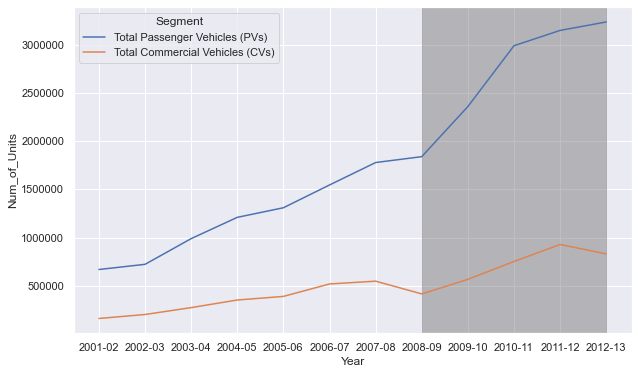

In [196]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data=pv_cv_df, x="Year", y="Num_of_Units",hue="Segment", units=None, estimator=None)
plt.ticklabel_format(style='plain', axis='y')
plt.axvspan(11,7,alpha=0.5,color='grey')
plt.show()

1. Passenger Vehicles have had a very steep growth since 2008-09, after the recession period. The growth of Commercial vehicles has been less comparatively.
2. Line chart has been chosen since it is the best in portraying time series/change over a period of time.
3. Preattentive attributes - Color and Position
4. Gestalt Principles - Continuation, Similarity, Figure/Ground 
5.Fill in the blanks:<br>
    1.In percentage terms, the total growth recorded for passenger vehicles is 382.82% during the period from 2001-02 to 2012-13.<br>
    2.In percentage terms, the total growth recorded for commercial vehicles is 411.81% during the period from 2001-02 to 2012-13.

### Question 2
<h4>Analyse the passenger vehicle production(segment wise) during 2001-02 to 2012-13<br><br>
    Write the python code in the below cell to create the appropriate visual(single visual) to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
    5.Fill in the blanks.<br>
    
   <i>1.In percentage terms, the growth of production of passenger cars in India was ________ during the period from 2001-02 to 2012-13</i><br><br>
    <i>2.In percentage terms, the growth the production of Multi-Utility Vehicles in India was ________ during the period from 2001-02 to 2012-13.

In [197]:
pv_df = df_without_totals[df_without_totals['Category']=='Passenger Vehicles (PVs)']

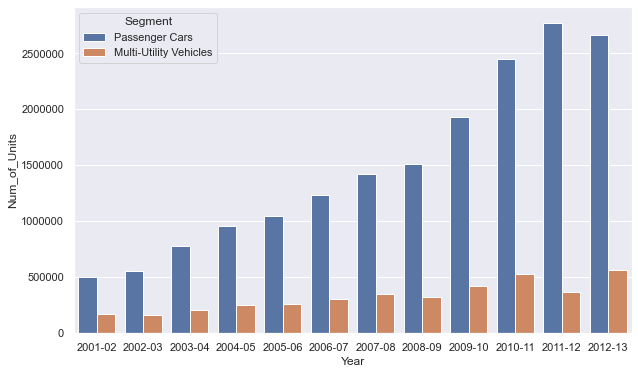

In [198]:
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(data=pv_df, x="Year", y="Num_of_Units",hue="Segment")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

1. Passenger cars have contributed more towards the growth in this category.
2. Reason for selecting bar chart - so that we can indicate which segments moved up/down in a given year. This would not be so evident in a line chart.
3. Preattentive attributes - Color and Size
4. Gestalt Principles - Continuation, Similarity, Figure/Ground 
5. Fill in the blanks.<br>
    1.In percentage terms, the growth of production of passenger cars in India was 433.40% during the period from 2001-02 to 2012-13.<br>
    2.In percentage terms, the growth the production of Multi-Utility Vehicles in India was 233.45% during the period from 2001-02 to 2012-13.

### Question 3
<h4>Compare the production of 2 wheeler and three wheelers in India from 2001-02 to 2012-13, in a single visual.<br><br>
    Write the python code in the below cell to create appropriate visual to perform the above task.
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
    

In [201]:
twv_thv_df = df_totals[df_totals['Segment'].isin(['Total Three Wheelers','Total Two wheelers'])]

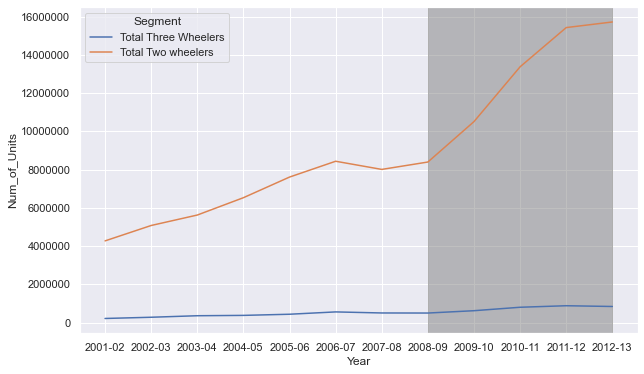

In [202]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data=twv_thv_df, x="Year", y="Num_of_Units",hue="Segment")
plt.ticklabel_format(style='plain', axis='y')
plt.axvspan(11,7,alpha=0.5,color='grey')
plt.show()

1. In absolute number of vehicles produced, number of two wheelers are way higher than the number of three wheelers produced. But the percentage increase is almost equal for both from 2001-02 to 2012-13 with 294.17% increase for three wheelers and 268.06% increase for two wheelers.
2. Line chart has been chosen since it is the best in portraying time series/change over a period of time.
3. Preattentive attributes - Color and Size
4. Gestalt Principles - Continuation, Similarity, Figure/Ground 

### Question 4
<h4>Analyse the two wheeler production in India(segment wise) during 2001-02 to 2012-13.<br><br>
    Write the python code in the below cell to create the appropriate visual(single visual) to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
    

In [204]:
twv_df = df_without_totals[df_without_totals['Category']=='Two wheelers']

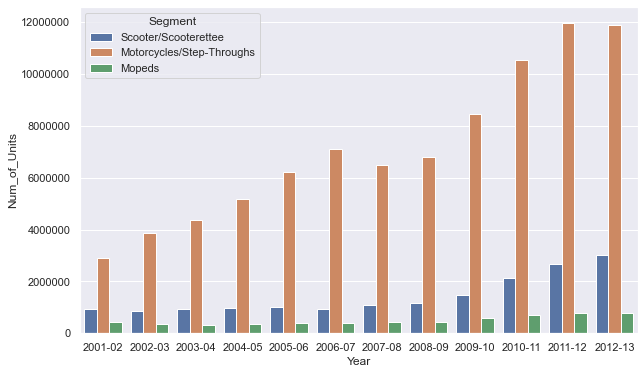

In [205]:
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(data=twv_df, x="Year", y="Num_of_Units",hue="Segment")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

1. All the three segments have seen positive growth in units produced from 2001-02 to 2012-13. Though in absolute numbers, motorcycles have contributed the most in terms of total units produced.
2. Reason for selecting bar chart - so that we can indicate which segments moved up/down in a given year. This would not be so evident in a line chart.
3. Preattentive attributes - Color and Size
4. Gestalt Principles - Continuation, Similarity, Figure/Ground 

### Question 5

<h4>Analyse the three wheeler production in India(segment wise) during 2001-02 to 2012-13.<br><br>
    Write the python code in the below cell to create the appropriate visual(single visual) to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
    

In [206]:
thv_df = df_without_totals[df_without_totals['Category']=='Three Wheelers']

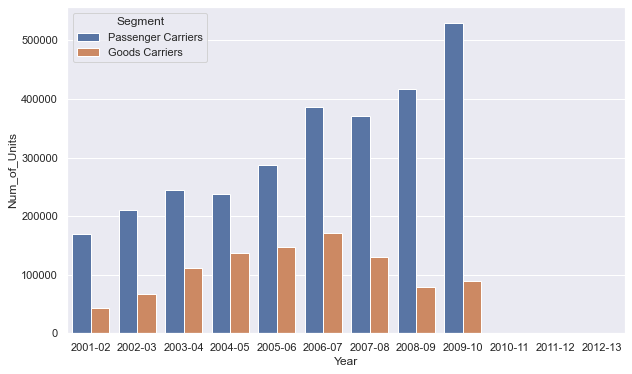

In [207]:
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(data=thv_df, x="Year", y="Num_of_Units",hue="Segment")

plt.ticklabel_format(style='plain', axis='y')
plt.show()

1. For the period from 2001-02 to 2009-10, the number of units produced in the passenger carriers segment has seen a steady year on year increase except in 2004-05 and 2007-08. Whereas, the goods carriers hasve seen an increase till 2006-07 and then the production fell till 2008-09. Post this, there was a rise in 2009-10.
2. Reason for selecting bar chart - so that we can indicate which segments moved up/down in a given year. This would not be so evident in a line chart.
3. Preattentive attributes - Color and Size
4. Gestalt Principles - Continuation, Similarity, Figure/Ground 

 # Group's choice-2 Marks
 
#### Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual.
 
 1. Write the question in a markdown cell
 2. Below the question, in a coding cell, write the python code to create the visual to answer the question  

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   2.The reason for selecting the chart type you did. <br>
   3.Mention the pre-attentive attributes used.(atleast 2)<br>
   4.Mention the gestalt principles used.(atleast 2)<br>
  

#### Analyse the total vehicle production in India across all categories during 2001-02 to 2012-13.

In [15]:
grand_tot_df = df_totals[df_totals['Category'].isin(['Grand Total'])]

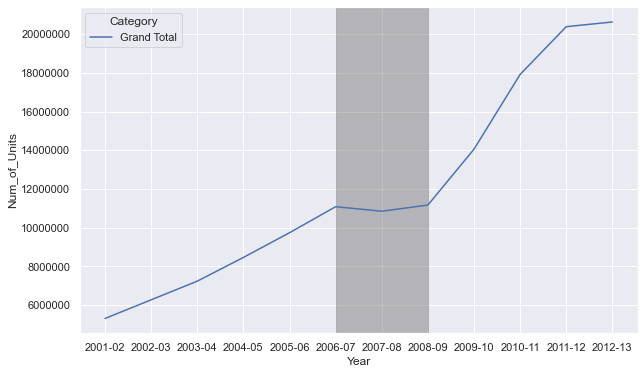

In [21]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data=grand_tot_df, x="Year", y="Num_of_Units",hue="Category")
plt.ticklabel_format(style='plain', axis='y')
plt.axvspan(7,5,alpha=0.5,color='grey')
plt.show()

1. Overall vehicle production in India has increased from 2001-02 to 2012-13. An anomaly can be observed  from 2006-07 to 2007-08 where the productuion has declined marginally and then continues to increase there on.
2. Line chart has been chosen since it is the best in portraying time series/change over a period of time.
3. Preattentive attributes - Color and Size
4. Gestalt Principles - Continuation, Similarity, Figure/Ground 

<h1><center> ************ END OF ASSIGNMENT ****************</center></h1>